In [1]:
import pandas as pd
import sqlite3
import numpy as np
import psycopg2
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt1
import seaborn as sns
import pylab as pl

In [2]:
con = sqlite3.connect('C:\\Users\\con05838\\OneDrive - ONE Gas INC\\Desktop\DataScienceClass\\SQL\\SQLChallenges\\SQLCHallenges')

In [3]:
#creates a dataframe while also connecting and executing a SQL query

df = pd.read_sql_query("SELECT \
timestamp, \
age,\
employer_industry_standardized, \
functional_area_job, \
job_title, \
salary, \
additional_compensation, \
currency, \
country, \
state, \
city, \
remote_or_onsite, \
yrs_experience, \
yrs_in_field, \
education, \
gender, \
race \
from Salary_Survey ss" ,con)

In [4]:
#creates a copy of the df
df.copy()

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
0,4/5/2022 11:37:42,45-54,"Accounting, Banking & Finance",Computing or Tech,Senior Integration Manager,"56,500","4,000",USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
1,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),"35,500",0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
2,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,"85,000",,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
3,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,"114,000",,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
4,4/5/2022 15:42:06,35-44,Media & Digital,Science,editor,"41,000",0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15274,4/6/2022 14:31:54,25-34,,Publishing,Production controller,,,,,,,,,,,,
15275,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15276,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15277,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,


In [5]:
#looks at the top 5 rows
df.head() 

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
0,4/5/2022 11:37:42,45-54,"Accounting, Banking & Finance",Computing or Tech,Senior Integration Manager,"56,500","4,000",USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
1,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),"35,500",0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
2,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,"85,000",,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
3,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,"114,000",,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
4,4/5/2022 15:42:06,35-44,Media & Digital,Science,editor,"41,000",0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White


In [6]:
#looks at the bottom 5 rows
df.tail() 

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
15274,4/6/2022 14:31:54,25-34,,Publishing,Production controller,,,,,,,,,,,,
15275,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15276,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15277,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,
15278,10/12/2022 9:20:07,25-34,,Nonprofits,Content manager,,,,,,,,,,,,


In [7]:
#brings 20 random rows from our df
df.sample(20)

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
11215,4/5/2022 17:47:44,55-64,"Marketing, Advertising & PR","Marketing, Advertising & PR",PR director,"149,000",,USD,United States,Georgia,Atlanta,Fully remote,21-30 years,21-30 years,College degree,Woman,White
4778,4/5/2022 18:42:18,35-44,Education (Higher Education),Library and information science,Assistant professor,"103,500",,USD,United States,New York,Syracuse,Other/it's complicated,11-20 years,11-20 years,PhD,Woman,White
4400,4/5/2022 14:15:07,25-34,Education (Higher Education),Education (Higher Education),Graduate student instructor,"34,000",,USD,United States,California,Bay Area,Hybrid,2-4 years,1 year or less,College degree,Woman,White
14848,4/5/2022 14:49:50,18-24,Transport or Logistics,Computing or Tech,Technical Artist,"40,500",0,EUR,Germany,,Erlangen,Hybrid,1 year or less,1 year or less,College degree,Woman,White
8443,4/7/2022 6:20:07,35-44,Government & Public Administration,Service Design,Service Designer,95200,0,CAD,Canada,,Remote,Fully remote,11-20 years,1 year or less,Master's degree,Woman,White
12836,4/6/2022 5:59:06,35-44,Nonprofits,"Marketing, Advertising & PR",Director of Marketing and Communications,"83,000","2,000",USD,United States,Massachusetts,Danvers,On-site,11-20 years,11-20 years,College degree,Man,White
3579,4/5/2022 11:11:50,25-34,Education (Higher Education),Library,Library Specialist,"39,665",,USD,United States,Maine,Portland & Gorham,,8-10 years,2-4 years,Master's degree,Other or prefer not to answer,White
5522,4/5/2022 11:27:57,45-54,Education (Primary/Secondary),Education (Primary/Secondary),AP English Instructor,"66,789","27,000",USD,United States,Florida,Orlando,On-site,21-30 years,21-30 years,Master's degree,Woman,"Middle Eastern or Northern African, White"
12638,4/5/2022 18:17:50,25-34,Nonprofits,Administration,Lead Talent & Admin Associate,"64,000",,USD,United States,New York,New York,Hybrid,5-7 years,5-7 years,College degree,Woman,White
7183,4/5/2022 14:08:11,25-34,Food and Beverage,Science,Lab Manager,"67,500","10,000",USD,United States,Arizona,Phoenix,On-site,11-20 years,8-10 years,College degree,Woman,Asian or Asian American


In [8]:
#shows rows and columns of the Dataframe
df.shape

(15279, 17)

In [9]:
# prints information about a DataFrame including the index dtype and columns, non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15279 entries, 0 to 15278
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   timestamp                       15279 non-null  object
 1   age                             15279 non-null  object
 2   employer_industry_standardized  15279 non-null  object
 3   functional_area_job             15279 non-null  object
 4   job_title                       15279 non-null  object
 5   salary                          15279 non-null  object
 6   additional_compensation         15279 non-null  object
 7   currency                        15279 non-null  object
 8   country                         15279 non-null  object
 9   state                           15279 non-null  object
 10  city                            15279 non-null  object
 11  remote_or_onsite                15279 non-null  object
 12  yrs_experience                  15279 non-null

In [10]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
count,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279,15279
unique,13366,7,38,976,9155,3102,826,12,108,106,3280,6,9,9,7,5,41
top,4/5/2022 11:26:47,25-34,Education (Higher Education),Computing or Tech,Project Manager,"75,000",0,USD,United States,,Boston,Hybrid,11-20 years,11-20 years,College degree,Woman,White
freq,5,6054,1987,2209,120,266,4658,12866,12779,2528,418,6004,5706,3942,6898,11998,13131


In [11]:
#checks for any null values in the dataframe
df.isnull().sum()

timestamp                         0
age                               0
employer_industry_standardized    0
functional_area_job               0
job_title                         0
salary                            0
additional_compensation           0
currency                          0
country                           0
state                             0
city                              0
remote_or_onsite                  0
yrs_experience                    0
yrs_in_field                      0
education                         0
gender                            0
race                              0
dtype: int64

In [12]:
df2=df.drop_duplicates()

In [13]:
#applies a lambda  to the entire dataframe removing all commas

df3 = df2.apply(lambda x: x.str.replace(',', ''))

In [14]:
#replaces blank  rows in the salary and  additional_compensation columns with 0
df3.loc[df3["salary"] == '',"salary"] = 0
df3.loc[df3["additional_compensation"] == '',"additional_compensation"] = 0

In [15]:
df3

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
0,4/5/2022 11:37:42,45-54,Accounting Banking & Finance,Computing or Tech,Senior Integration Manager,56500,4000,USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
1,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),35500,0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
2,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,85000,0,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
3,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,114000,0,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
4,4/5/2022 15:42:06,35-44,Media & Digital,Science,editor,41000,0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,4/6/2022 14:31:54,25-34,,Publishing,Production controller,0,0,,,,,,,,,,
15226,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,0,0,,,,,,,,,,
15227,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,0,0,,,,,,,,,,
15228,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,0,0,,,,,,,,,,


In [16]:
# converts columns salary and  additional_compensation to integer data type
df3[['salary','additional_compensation']] = df3[['salary','additional_compensation']].astype(int)

In [17]:
#checks the datatypes to verify the conversion happened
df3.dtypes

timestamp                         object
age                               object
employer_industry_standardized    object
functional_area_job               object
job_title                         object
salary                             int32
additional_compensation            int32
currency                          object
country                           object
state                             object
city                              object
remote_or_onsite                  object
yrs_experience                    object
yrs_in_field                      object
education                         object
gender                            object
race                              object
dtype: object

In [18]:
df3

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
0,4/5/2022 11:37:42,45-54,Accounting Banking & Finance,Computing or Tech,Senior Integration Manager,56500,4000,USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
1,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),35500,0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
2,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,85000,0,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
3,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,114000,0,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
4,4/5/2022 15:42:06,35-44,Media & Digital,Science,editor,41000,0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,4/6/2022 14:31:54,25-34,,Publishing,Production controller,0,0,,,,,,,,,,
15226,4/13/2022 6:10:49,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,0,0,,,,,,,,,,
15227,4/27/2022 3:30:22,25-34,,Computing or Tech,Email Marketing Manager,0,0,,,,,,,,,,
15228,5/16/2022 17:20:17,45-54,,Engineering or Manufacturing,Project management,0,0,,,,,,,,,,


In [19]:
#runs a lambda and throws the calculations of Salary + additional compensation into a new colum called 'Total_Salary'

def additional_pay(x, y):
    return x + y

df3['Total_Salary']=df3.apply(lambda x: additional_pay(x['salary'], x['additional_compensation']), axis=1)

In [20]:
df3.head(50)

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race,Total_Salary
0,4/5/2022 11:37:42,45-54,Accounting Banking & Finance,Computing or Tech,Senior Integration Manager,56500,4000,USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White,60500
1,4/5/2022 13:09:28,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),35500,0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White,35500
2,4/5/2022 11:38:40,35-44,Education (Higher Education),Science,Quality Associate,85000,0,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White,85000
3,4/5/2022 12:07:55,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,114000,0,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White,114000
4,4/5/2022 15:42:06,35-44,Media & Digital,Science,editor,41000,0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White,41000
5,4/6/2022 5:40:48,35-44,Education (Higher Education),Publishing,Translator/Editor,47000,0,GBP,Great Britain,,London,Hybrid,11-20 years,8-10 years,Master's degree,Man,White,47000
6,4/9/2022 16:57:17,45-54,Computing or Tech,Computing or Tech,Software Development Manager,86000,5000,CAD,Canada,,Ottawa,On-site,11-20 years,11-20 years,Some college,Man,Asian or Asian American,91000
7,4/5/2022 15:21:35,35-44,Accounting Banking & Finance,Accounting Banking & Finance,Secretary,80000,0,Other,Argentina,,Caba,On-site,8-10 years,8-10 years,Professional degree (MD JD etc.),Woman,Hispanic Latino or Spanish origin,80000
8,4/5/2022 11:02:06,35-44,Accounting Banking & Finance,Computing or Tech,Senior Data Engineer,150000,4000,USD,United States,Pennsylvania,Pittsburgh,,11-20 years,8-10 years,Some college,Woman,White,154000
9,4/5/2022 11:03:07,25-34,Accounting Banking & Finance,Marketing Advertising & PR,Product marketing specialist,65000,1500,USD,United States,Minnesota,Minneapolis,,5-7 years,1 year or less,College degree,Woman,White,66500


In [21]:
# aggregates the maximum and minimum  Total salary based on employer_industry and participant

df4=df3.groupby(['timestamp','employer_industry_standardized']).agg(
    maximum=pd.NamedAgg(column='Total_Salary', aggfunc='max'), 
    minimum=pd.NamedAgg(column='Total_Salary', aggfunc='min')).reset_index()

In [22]:
#sorts the data by participant and maximum compensation

df4

,timestamp,employer_industry_standardized,maximum,minimum
0,1/11/2023 10:54:29,Engineering or Manufacturing,60000,60000
1,1/13/2023 12:11:39,Utilities & Telecommunications,156500,156500
2,1/13/2023 14:33:56,Nonprofits,118000,118000
3,1/14/2023 13:24:31,Retail,115250,115250
4,1/14/2023 15:56:30,Media & Digital,41000,41000
...,...,...,...,...
15075,9/5/2022 23:49:32,Computing or Tech,235000,235000
15076,9/5/2022 8:57:56,Nonprofits,26749,26749
15077,9/6/2022 14:03:03,Government & Public Administration,84000,84000
15078,9/7/2022 18:29:31,Business or Consulting,105000,105000


In [23]:
#creates a new dataframe and then sorts it by participant and maximum value
df5=df4.sort_values(by=['timestamp','maximum'])

In [24]:
#removes the minimum column
df6=df5.drop(['minimum'], axis=1)

In [25]:
#ready for export

df6.to_csv('DF1.csv')

In [26]:
df5=df3.groupby(['employer_industry_standardized','country','education','gender','race']).count().reset_index()

In [27]:
df5

,employer_industry_standardized,country,education,gender,race,timestamp,age,functional_area_job,job_title,salary,additional_compensation,currency,state,city,remote_or_onsite,yrs_experience,yrs_in_field,Total_Salary
0,,,,,,48,48,48,48,48,48,48,48,48,48,48,48,48
1,Accounting Banking & Finance,Argentina,Professional degree (MD JD etc.),Woman,Hispanic Latino or Spanish origin,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Accounting Banking & Finance,Australia,College degree,Man,White,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Accounting Banking & Finance,Australia,College degree,Woman,White,4,4,4,4,4,4,4,4,4,4,4,4,4
4,Accounting Banking & Finance,Australia,High School,Woman,White,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,Utilities & Telecommunications,United States,Some college,Man,White,5,5,5,5,5,5,5,5,5,5,5,5,5
2497,Utilities & Telecommunications,United States,Some college,Non-binary,White,2,2,2,2,2,2,2,2,2,2,2,2,2
2498,Utilities & Telecommunications,United States,Some college,Woman,Hispanic Latino or Spanish origin,1,1,1,1,1,1,1,1,1,1,1,1,1
2499,Utilities & Telecommunications,United States,Some college,Woman,Native American or Alaska Native White,1,1,1,1,1,1,1,1,1,1,1,1,1


In [28]:
#finds the total number of participants by employer industry, country, education, gender, race
df7=pd.read_sql_query("SELECT \
count(timestamp) as participants, \
employer_industry_standardized, \
country, \
education, \
gender, \
race \
from Salary_Survey ss \
group by employer_industry_standardized, country, education, gender, race \
order by 'Total_Salary'" ,con)

In [29]:
#removes duplicates
df8=df7.drop_duplicates()

In [30]:
df8

,participants,employer_industry_standardized,country,education,gender,race
0,96,,,,,
1,1,"Accounting, Banking & Finance",Argentina,"Professional degree (MD, JD, etc.)",Woman,"Hispanic, Latino, or Spanish origin"
2,2,"Accounting, Banking & Finance",Australia,College degree,Man,White
3,4,"Accounting, Banking & Finance",Australia,College degree,Woman,White
4,2,"Accounting, Banking & Finance",Australia,High School,Woman,White
...,...,...,...,...,...,...
2496,5,Utilities & Telecommunications,United States,Some college,Man,White
2497,2,Utilities & Telecommunications,United States,Some college,Non-binary,White
2498,1,Utilities & Telecommunications,United States,Some college,Woman,"Hispanic, Latino, or Spanish origin"
2499,1,Utilities & Telecommunications,United States,Some college,Woman,"Native American or Alaska Native, White"


In [31]:
#ready for export

df8.to_csv('DF2.csv')

Text(0.5, 1.0, 'People per industry')

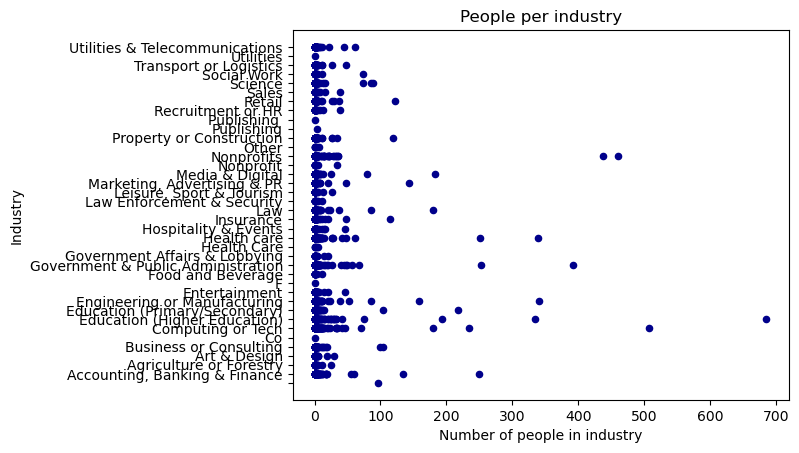

In [32]:
ax1 = df8.plot.scatter(x='participants',
                      y='employer_industry_standardized',
                      c='DarkBlue')

plt.xlabel("Number of people in industry")
plt.ylabel("Industry")
plt.title("People per industry")

In [33]:
#looks at the top 10 entries for salaries overall
df_max=df6.head(10)
df_max

,timestamp,employer_industry_standardized,maximum
0,1/11/2023 10:54:29,Engineering or Manufacturing,60000
1,1/13/2023 12:11:39,Utilities & Telecommunications,156500
2,1/13/2023 14:33:56,Nonprofits,118000
3,1/14/2023 13:24:31,Retail,115250
4,1/14/2023 15:56:30,Media & Digital,41000
5,1/14/2023 2:37:36,Sales,57000
6,1/15/2023 23:25:25,Health care,75000
7,1/17/2023 15:08:45,Health care,110000
8,1/18/2023 23:03:25,Engineering or Manufacturing,49010
9,1/20/2023 13:46:07,Art & Design,40200


In [34]:
# takes the top 10  of the maximum salary and industry and assigns them variables
y = df_max['maximum'].head(10)
x= df_max['employer_industry_standardized'].head(10)

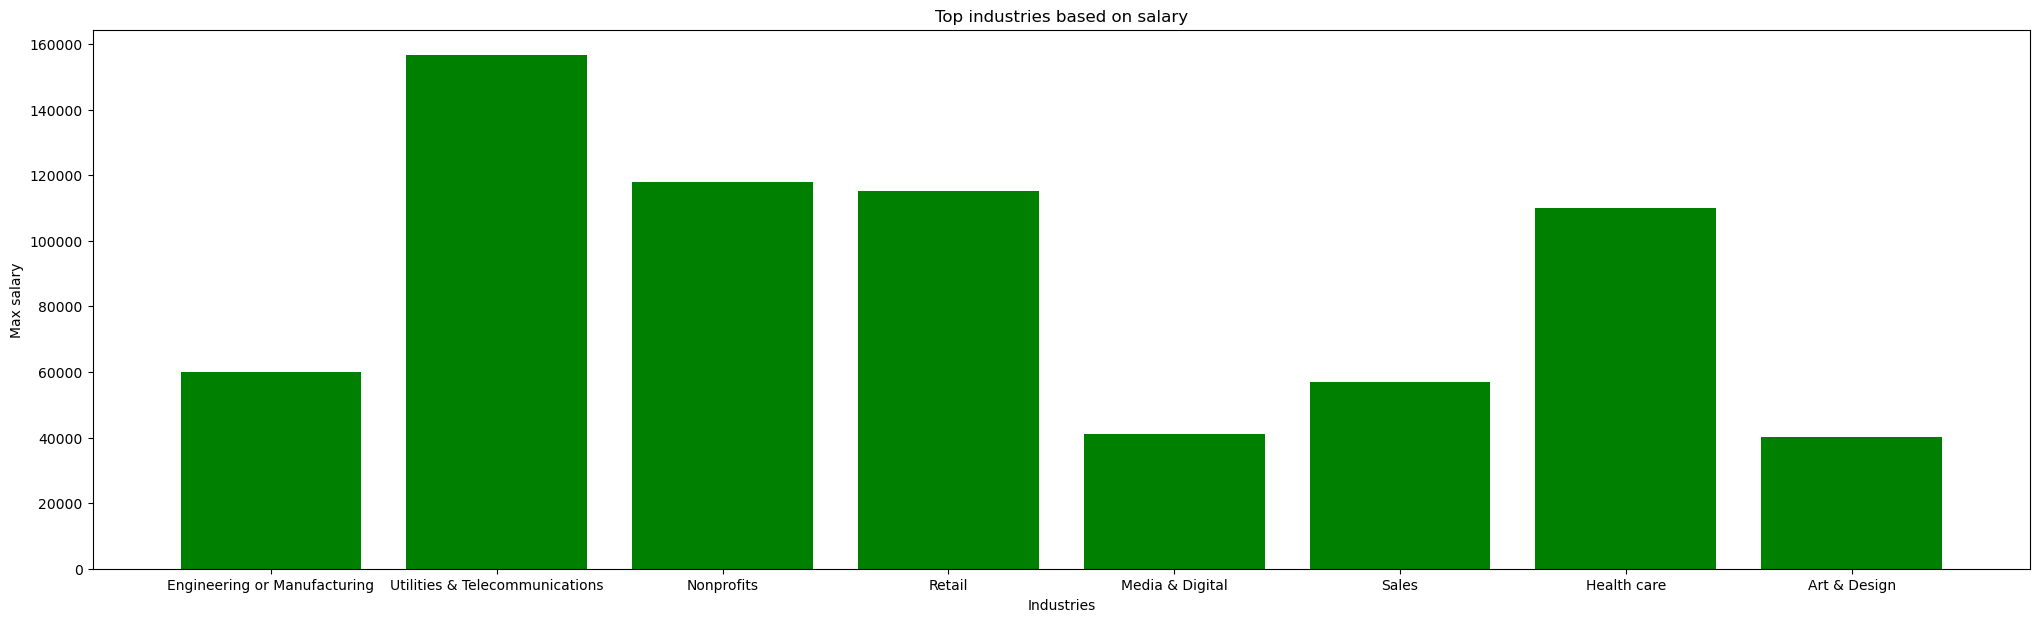

In [35]:
#creates a bar chart based off 
 
# Figure Size
fig = plt.figure(figsize =(25, 7))
 
# Horizontal Bar Plot
plt.bar(x[0:20], y[0:20],color='green')
 
plt.xlabel("Industries")
plt.ylabel("Max salary")
plt.title("Top industries based on salary")


# Show Plot
plt.show()

# What is the best industry for women based on salary and additional compensation?

In [112]:
#queries that  calculates the total salary and filters the data by Women
df_ = pd.read_sql_query("SELECT \
employer_industry_standardized, \
salary, \
additional_compensation,\
max(salary + additional_compensation) as 'total_salary',\
education, \
gender, \
race \
from Salary_Survey ss \
where gender like 'Woman' \
group by  gender, employer_industry_standardized",con)

In [113]:
df_

,employer_industry_standardized,salary,additional_compensation,total_salary,education,gender,race
0,"Accounting, Banking & Finance",850000,,850000,Master's degree,Woman,White
1,Agriculture or Forestry,123000,23000,146000,Master's degree,Woman,"Asian or Asian American, White"
2,Art & Design,136000,38000,174000,Some college,Woman,White
3,Business or Consulting,200000,8000,208000,College degree,Woman,White
4,Co,"106,000","8,000",114,Master's degree,Woman,White
5,Computing or Tech,180000,400000,580000,College degree,Woman,White
6,Education (Higher Education),320184,,320184,College degree,Woman,White
7,Education (Primary/Secondary),320000,,320000,College degree,Woman,White
8,Engineering or Manufacturing,240000,200000,440000,PhD,Woman,White
9,Entertainment,225000,50000,275000,College degree,Woman,White


In [114]:
#removes duplicates
#DF_female=df_.drop_duplicates()

In [115]:
#converts  'converted_salary','converted_additional_compensation' to str
DF_female['converted_salary']= DF_female.salary.astype('str')
DF_female['converted_additional_compensation']= DF_female.additional_compensation.astype('str')

In [116]:
#drops  'additional_compensation','salary','total_salary'
DF_Female=DF_female.drop(['additional_compensation','salary','total_salary'], axis=1)

In [118]:
#removed all commas from the data grames
df_female1 = DF_Female.apply(lambda x: x.str.replace(',', ''))

In [119]:
# replacing all blank rows with 0
df_female1.loc[df_female1["converted_salary"] == '',"converted_salary"] = 0
df_female1.loc[df_female1["converted_additional_compensation"] == '',"converted_additional_compensation"] = 0

In [120]:
#creates a converted column back to int variables
df_female1['intconverted_salary']= df_female1.converted_salary.astype('int')
df_female1['intconverted_additional_compensation']= df_female1.converted_additional_compensation.astype('int')

In [121]:
#drops  'additional_compensation','salary','total_salary'
df_Female2=df_female1.drop(['converted_salary','converted_additional_compensation'], axis=1)

In [122]:
# creates a function to create a new column called Total_Salary and then adds intconverted_salary and intconverted_additional_compensation together
# and throws the data in the new column
def additional_pay3(x, y):
    return x + y

df_Female2['Total_Salary']=df_Female2.apply(lambda x: additional_pay3(x['intconverted_salary'], x['intconverted_additional_compensation']), axis=1)

In [123]:
#sorts the data by total salary and then looks at the 
df_Female2.sort_values(by=['Total_Salary'],axis=0, ascending=True)
df_Femaletop10 =df_Female2.tail(10).reset_index()
df_Femaletop10

,index,employer_industry_standardized,education,gender,race,intconverted_salary,intconverted_additional_compensation,Total_Salary
0,27,Publishing,College degree,Woman,White,82000,25000,107000
1,28,Publishing,College degree,Woman,White,78000,40000,118000
2,29,Recruitment or HR,College degree,Woman,White,110000,50000,160000
3,30,Retail,Master's degree,Woman,White,580000,0,580000
4,31,Sales,College degree,Woman,White,105000,15000,120000
5,32,Science,College degree,Woman,White,348000,150000,498000
6,33,Social Work,Master's degree,Woman,White,140000,5000,145000
7,34,Transport or Logistics,College degree,Woman,Asian or Asian American,20500000,65500000,86000000
8,35,Utilities,College degree,Woman,White,76000,15000,91000
9,36,Utilities & Telecommunications,College degree,Woman,Hispanic Latino or Spanish origin,640000,253000,893000


In [124]:
df_Female2.groupby(['employer_industry_standardized'])['Total_Salary'].mean()

employer_industry_standardized
Accounting Banking & Finance            850000.0
Agriculture or Forestry                 146000.0
Art & Design                            174000.0
Business or Consulting                  208000.0
Co                                      114000.0
Computing or Tech                       580000.0
Education (Higher Education)            320184.0
Education (Primary/Secondary)           320000.0
Engineering or Manufacturing            440000.0
Entertainment                           275000.0
F                                        90400.0
Food and Beverage                       150000.0
Government & Public Administration      384000.0
Government Affairs & Lobbying           210000.0
Health Care                             100000.0
Health care                             450000.0
Hospitality & Events                    220000.0
Insurance                               200000.0
Law                                     465000.0
Law Enforcement & Security            

In [132]:
yy = df_Female2['employer_industry_standardized'].head(10)
xx= df_Female2['Total_Salary'].head(10)

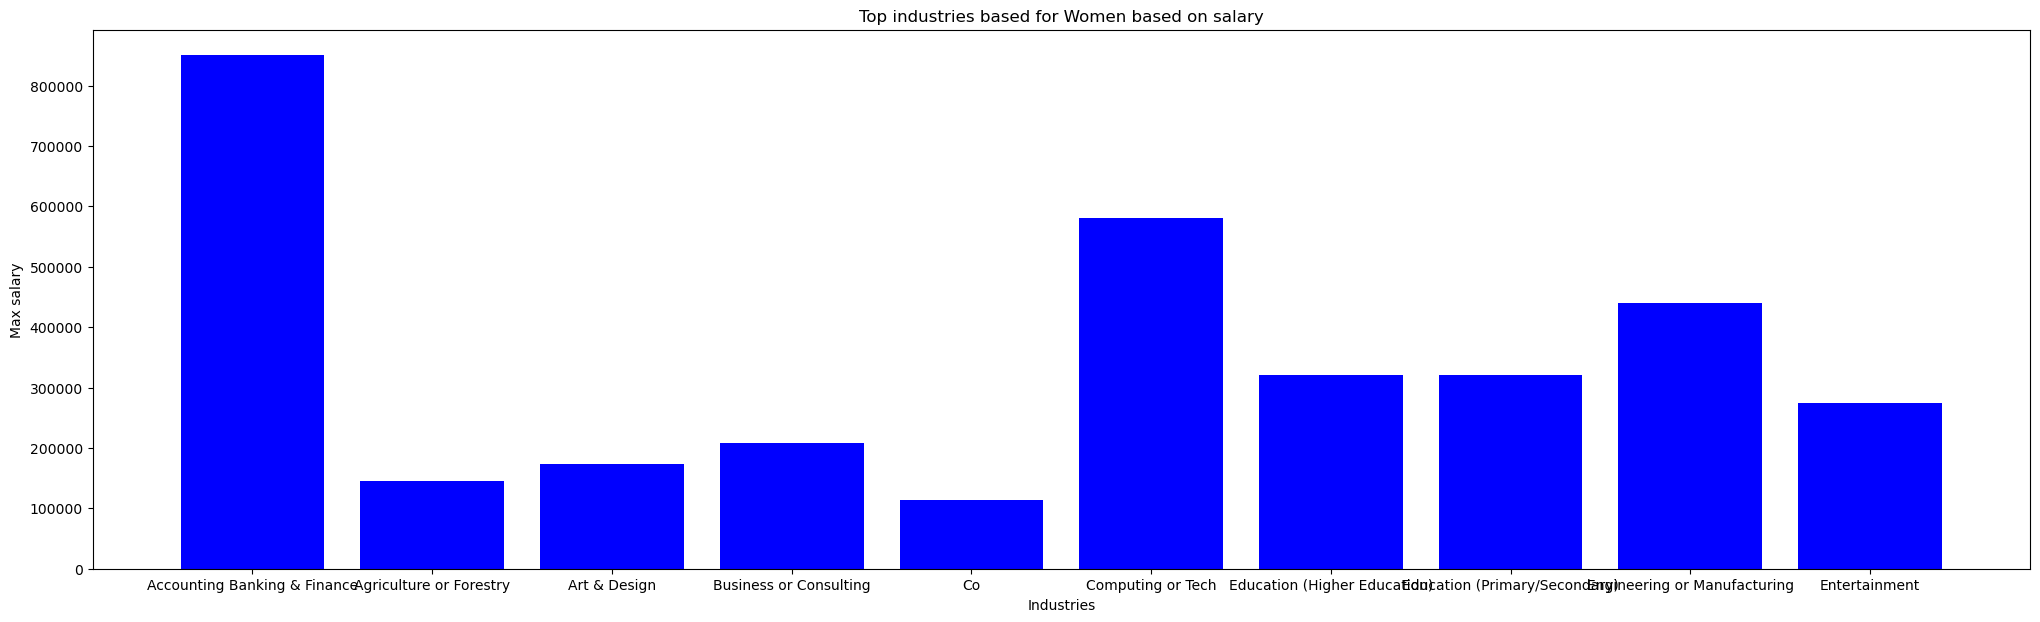

In [126]:
fig1 = plt.figure(figsize =(25, 7))
 
#  Bar Plot
plt.bar(yy,xx,color='blue')
 
plt.xlabel("Industries")
plt.ylabel("Max salary")
plt.title("Top industries based for Women based on salary")


# Show Plot
plt.show()

#We do have incomplete data and one major outliar  being:"Transport or Logistics	86000000	College degree	Woman	Asian" but from the data that we do have it would look like the Accounting Banking & Finance is one of our top  paying industries for Women with Computing or Tech Indstries taking second place.

# 	What is the best industry for non-college educated men based on salary and additional compensation

In [49]:
df_male=pd.read_sql_query("SELECT \
employer_industry_standardized, \
salary, \
additional_compensation, \
max(salary + additional_compensation) as 'total_salary', \
education, \
gender, \
race \
from Salary_Survey ss \
where gender  = 'Man' AND education = 'Some college' OR 'High School' \
group by  gender, employer_industry_standardized" ,con)

In [50]:
df_male

,employer_industry_standardized,salary,additional_compensation,total_salary,education,gender,race
0,"Accounting, Banking & Finance",240000,0,240000,Some college,Man,White
1,Agriculture or Forestry,"70,000",,70,Some college,Man,White
2,Art & Design,"108,000","16,200",124,Some college,Man,Asian or Asian American
3,Business or Consulting,173000,33000,206000,Some college,Man,White
4,Computing or Tech,175000,35000,210000,Some college,Man,White
5,Education (Higher Education),"57,500",0,57,Some college,Man,White
6,Education (Primary/Secondary),"55,000",,55,Some college,Man,White
7,Engineering or Manufacturing,104500,10450,114950,Some college,Man,White
8,Entertainment,"136,000","15,000",151,Some college,Man,White
9,Food and Beverage,"85,000",,85,Some college,Man,White


In [51]:
#converts  'converted_salary','converted_additional_compensation' to str
df_male['converted_salary']= df_male.salary.astype('str')
df_male['converted_additional_compensation']= df_male.additional_compensation.astype('str')

In [52]:
#drops  'additional_compensation','salary','total_salary'
df_Male=df_male.drop(['additional_compensation','salary','total_salary'], axis=1)

In [53]:
#removed all commas from the data grames
df_Male1 = df_Male.apply(lambda x: x.str.replace(',', ''))

In [54]:
# replacing all blank rows with 0
df_Male1.loc[df_Male1["converted_salary"] == '',"converted_salary"] = 0
df_Male1.loc[df_Male1["converted_additional_compensation"] == '',"converted_additional_compensation"] = 0

In [55]:
#creates a converted column back to int variables
df_Male1['intconverted_salary']= df_Male1.converted_salary.astype('int')
df_Male1['intconverted_additional_compensation']= df_Male1.converted_additional_compensation.astype('int')

In [56]:
#drops  'additional_compensation','salary','total_salary'
df_Male2=df_Male1.drop(['converted_salary','converted_additional_compensation'], axis=1)

In [57]:
# creates a function to create a new column called Total_Salary and then adds intconverted_salary and intconverted_additional_compensation together
# and throws the data in the new column

def additional_pay2(x, y):
    return x + y

df_Male2['Total_Salary']=df_Male2.apply(lambda x: additional_pay2(x['intconverted_salary'], x['intconverted_additional_compensation']), axis=1)

In [59]:
#sorts the data by total salary and then looks at the 
df_Male2.sort_values(by=['Total_Salary'],axis=0, ascending=True)
df_Maletop10 =df_Male2.head(20).reset_index()
df_Maletop10

,index,employer_industry_standardized,education,gender,race,intconverted_salary,intconverted_additional_compensation,Total_Salary
0,0,Accounting Banking & Finance,Some college,Man,White,240000,0,240000
1,1,Agriculture or Forestry,Some college,Man,White,70000,0,70000
2,2,Art & Design,Some college,Man,Asian or Asian American,108000,16200,124200
3,3,Business or Consulting,Some college,Man,White,173000,33000,206000
4,4,Computing or Tech,Some college,Man,White,175000,35000,210000
5,5,Education (Higher Education),Some college,Man,White,57500,0,57500
6,6,Education (Primary/Secondary),Some college,Man,White,55000,0,55000
7,7,Engineering or Manufacturing,Some college,Man,White,104500,10450,114950
8,8,Entertainment,Some college,Man,White,136000,15000,151000
9,9,Food and Beverage,Some college,Man,White,85000,0,85000


In [133]:
yyy = df_Male2['employer_industry_standardized'].head(10)
xxx= df_Male2['Total_Salary'].head(10)

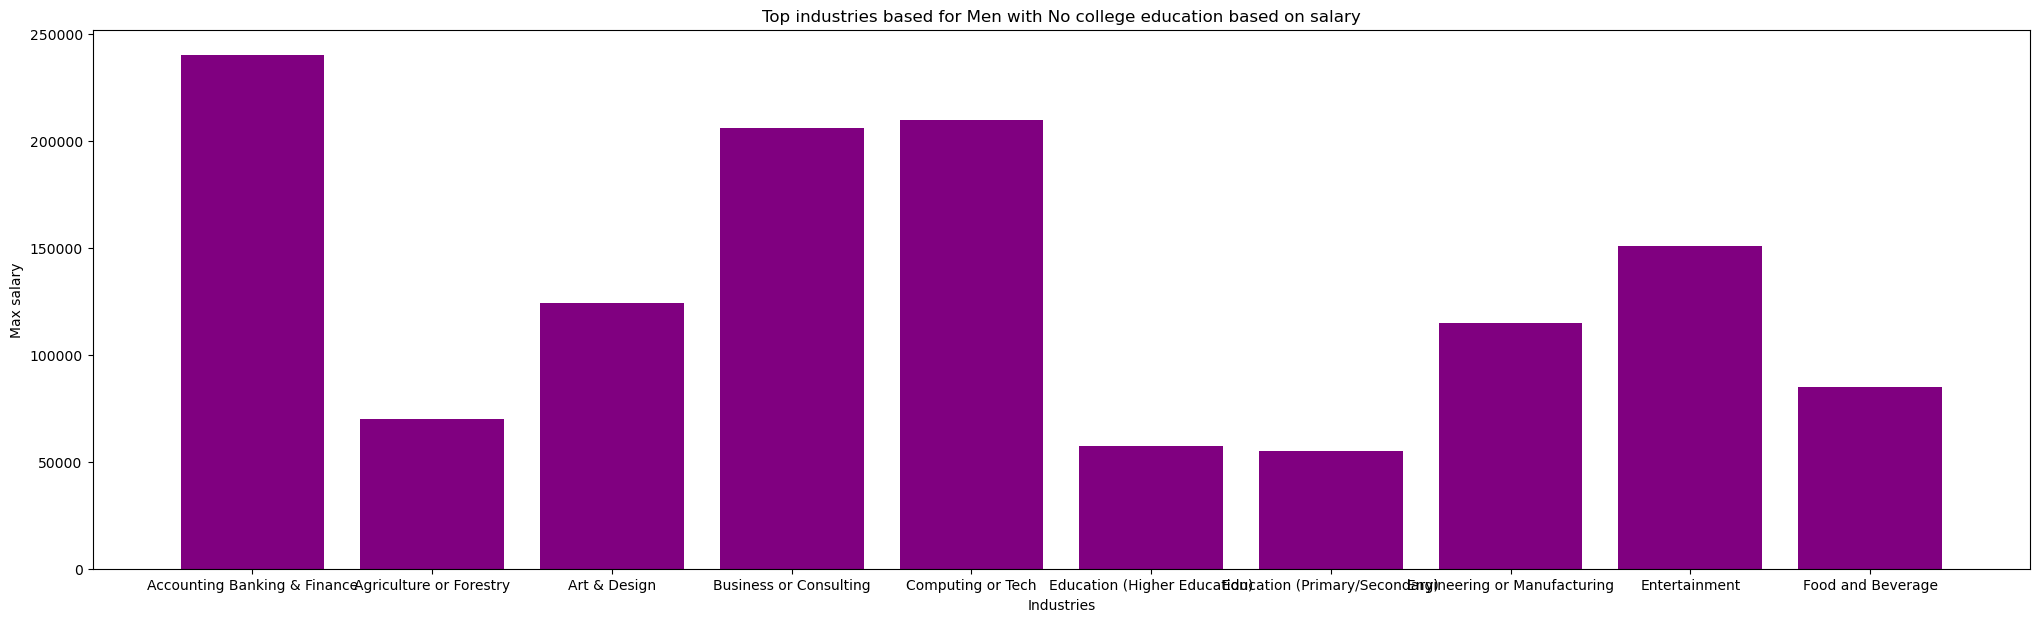

In [135]:
fig1 = plt.figure(figsize =(25, 7))
 
#  Bar Plot
plt.bar(yyy,xxx,color='purple')
 
plt.xlabel("Industries")
plt.ylabel("Max salary")
plt.title("Top industries based for Men with No college education based on salary")


# Show Plot
plt.show()

#based on the data that I am seeing it is much the same as it is with Women Account Banking an Finance is one of the top  industries with business or consulting and computing or tech tied for second.